<a href="https://colab.research.google.com/github/DevEnriquegd/ca-alura-store/blob/main/AluraStore_JEGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [30]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [32]:
tienda.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
876,Auriculares,Electrónicos,77600.0,2300.0,03/06/2022,Lucas Olivera,Bogotá,5,Tarjeta de crédito,6,4.60971,-74.08175
544,Guitarra eléctrica,Instrumentos musicales,694700.0,44400.0,03/08/2022,Juan Fernandez,Bogotá,5,Tarjeta de crédito,10,4.60971,-74.08175
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
1653,Sillón,Muebles,278300.0,13000.0,16/05/2021,Izabela de León,Cali,1,Nequi,1,3.43722,-76.52250
1499,Set de ollas,Artículos para el hogar,203500.0,9000.0,11/04/2020,Camila Rivera,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
498,Silla de oficina,Muebles,301800.0,20900.0,27/09/2020,Lucas Olivera,Cartagena,1,Tarjeta de crédito,8,10.39972,-75.51444
1506,Iniciando en programación,Libros,38900.0,0.0,16/03/2021,Beatriz Morales,Medellín,5,Nequi,1,6.25184,-75.56359
2208,Microondas,Electrodomésticos,588700.0,31600.0,10/06/2021,Felipe Santos,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
1190,Modelado predictivo,Libros,66000.0,3700.0,09/11/2020,Lucas Olivera,Medellín,5,Cupón,1,6.25184,-75.56359
1204,Kit de bancas,Muebles,275800.0,14900.0,29/10/2021,Beatriz Morales,Cali,4,Tarjeta de crédito,1,3.43722,-76.52250


#1. Análisis de facturación



In [33]:
total_tienda1 = tienda['Precio'].sum()
total_tienda1

np.float64(1150880400.0)

In [34]:
total_tienda2 = tienda2['Precio'].sum()
total_tienda2

np.float64(1116343500.0)

In [35]:
total_tienda3 = tienda3['Precio'].sum()
total_tienda3

np.float64(1098019600.0)

In [36]:
total_tienda4 = tienda4['Precio'].sum()
total_tienda4

np.float64(1038375700.0)

<Axes: xlabel='Tiendas', ylabel='Facturación total'>

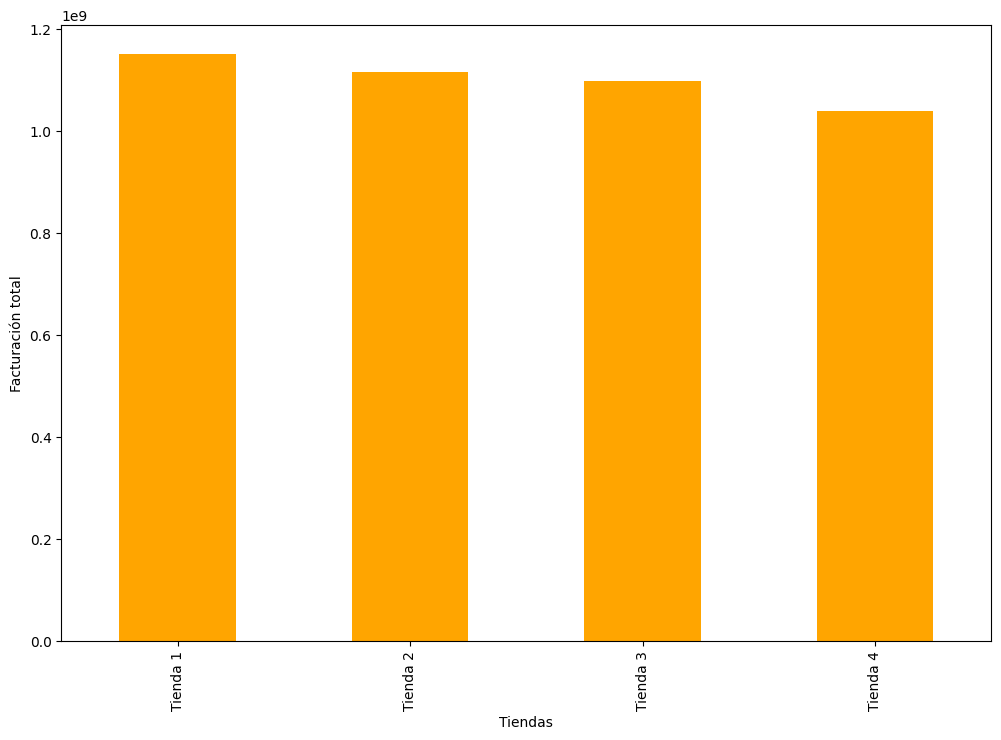

In [37]:
facturacion_por_tienda = pd.Series({
    'Tienda 1': total_tienda1,
    'Tienda 2': total_tienda2,
    'Tienda 3': total_tienda3,
    'Tienda 4': total_tienda4
})

facturacion_por_tienda = facturacion_por_tienda.sort_values(ascending=False)

facturacion_por_tienda.plot(kind='bar', figsize=(12,8), color='orange', xlabel='Tiendas', ylabel='Facturación total')

# 2. Ventas por categoría

<Axes: ylabel='count'>

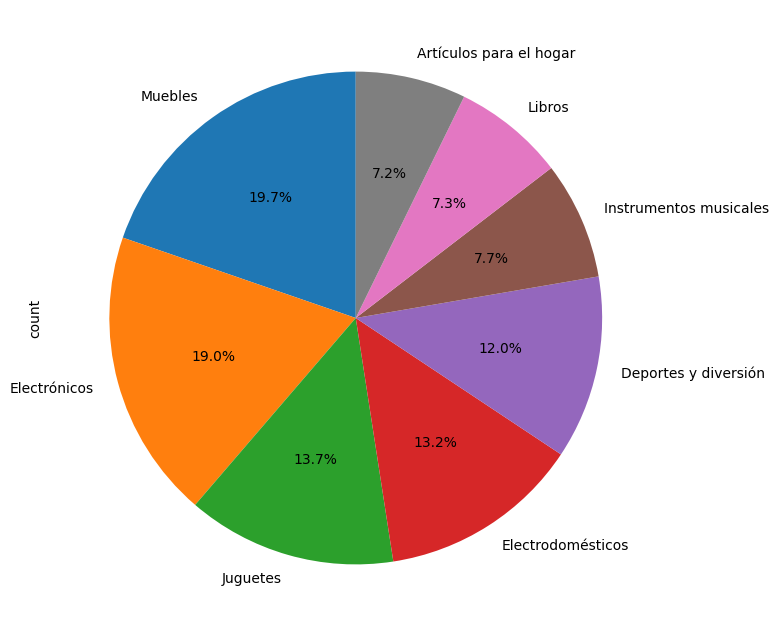

In [38]:
categorias_mas_vendidas_tienda1 = tienda['Categoría del Producto'].value_counts()
categorias_mas_vendidas_tienda1.plot(kind='pie', figsize=(12,8), autopct='%1.1f%%', startangle=90)

<Axes: ylabel='count'>

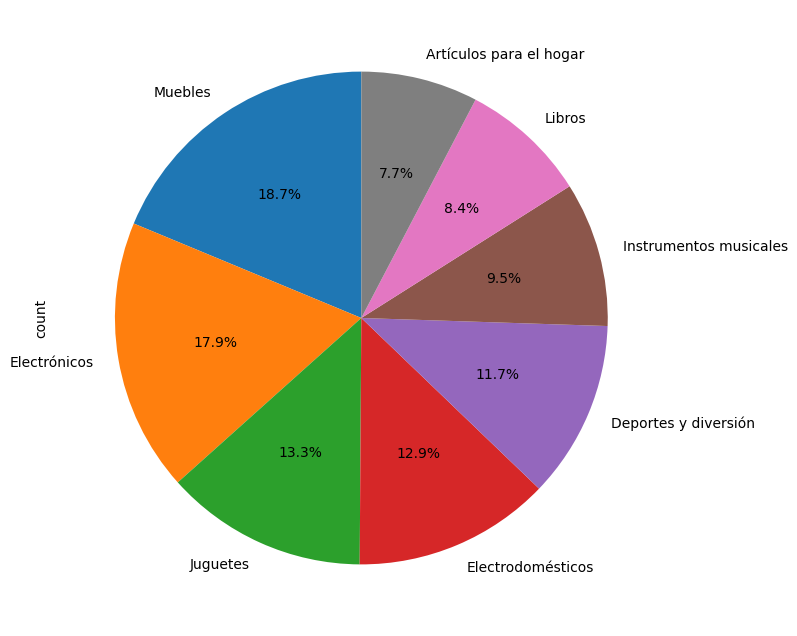

In [39]:
categorias_mas_vendidas_tienda2 = tienda2['Categoría del Producto'].value_counts()
categorias_mas_vendidas_tienda2.plot(kind='pie', figsize=(12,8), autopct='%1.1f%%', startangle=90)

<Axes: ylabel='count'>

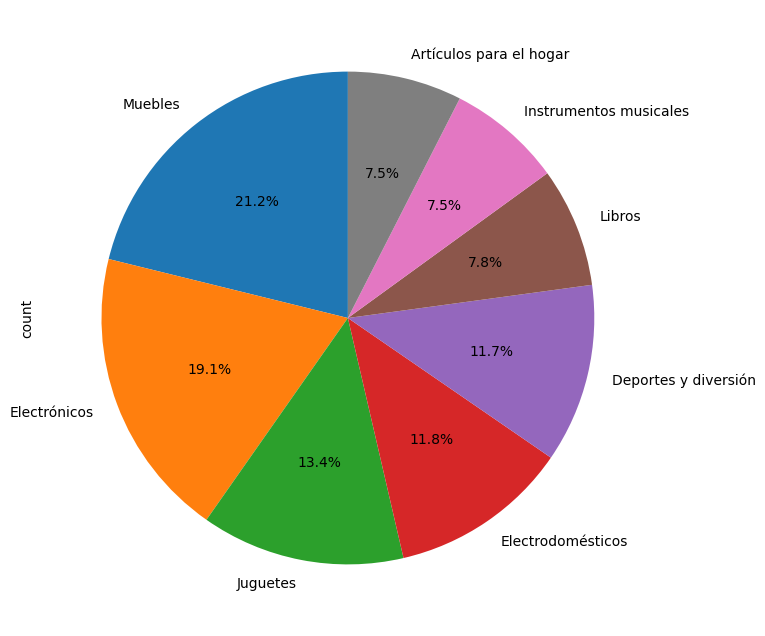

In [40]:
categorias_mas_vendidas_tienda3 = tienda3['Categoría del Producto'].value_counts()
categorias_mas_vendidas_tienda3.plot(kind='pie', figsize=(12,8), autopct='%1.1f%%', startangle=90)

<Axes: ylabel='count'>

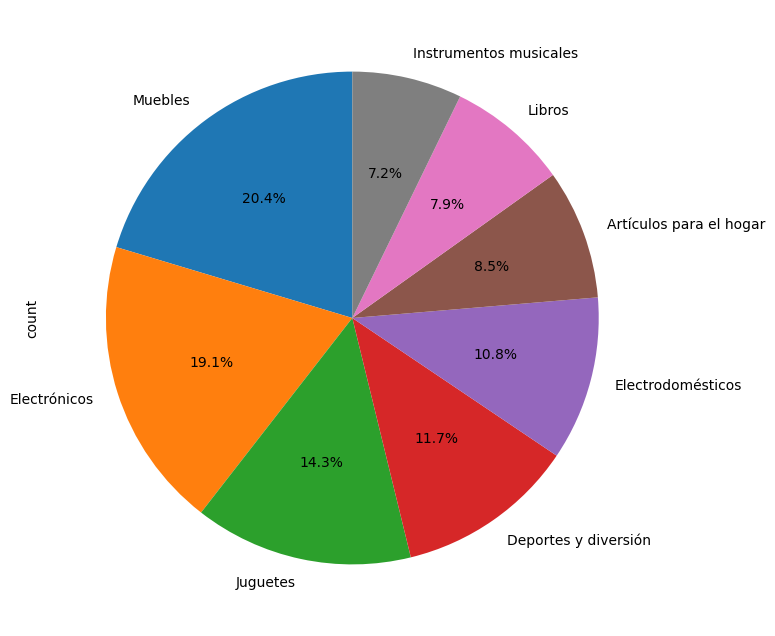

In [41]:
categorias_mas_vendidas_tienda4 = tienda4['Categoría del Producto'].value_counts()
categorias_mas_vendidas_tienda4.plot(kind='pie', figsize=(12,8), autopct='%1.1f%%', startangle=90)

# 3. Calificación promedio de la tienda


In [42]:
calificacion_tienda1 = round(tienda['Calificación'].mean(),2)
calificacion_tienda1

np.float64(3.98)

In [43]:
calificacion_tienda2 = round(tienda2['Calificación'].mean(),2)
calificacion_tienda2

np.float64(4.04)

In [44]:
calificacion_tienda3 = round(tienda3['Calificación'].mean(),2)
calificacion_tienda3

np.float64(4.05)

In [45]:
calificacion_tienda4 = round(tienda4['Calificación'].mean(),2)
calificacion_tienda4

np.float64(4.0)

<Axes: xlabel='Tiendas', ylabel='Facturación total'>

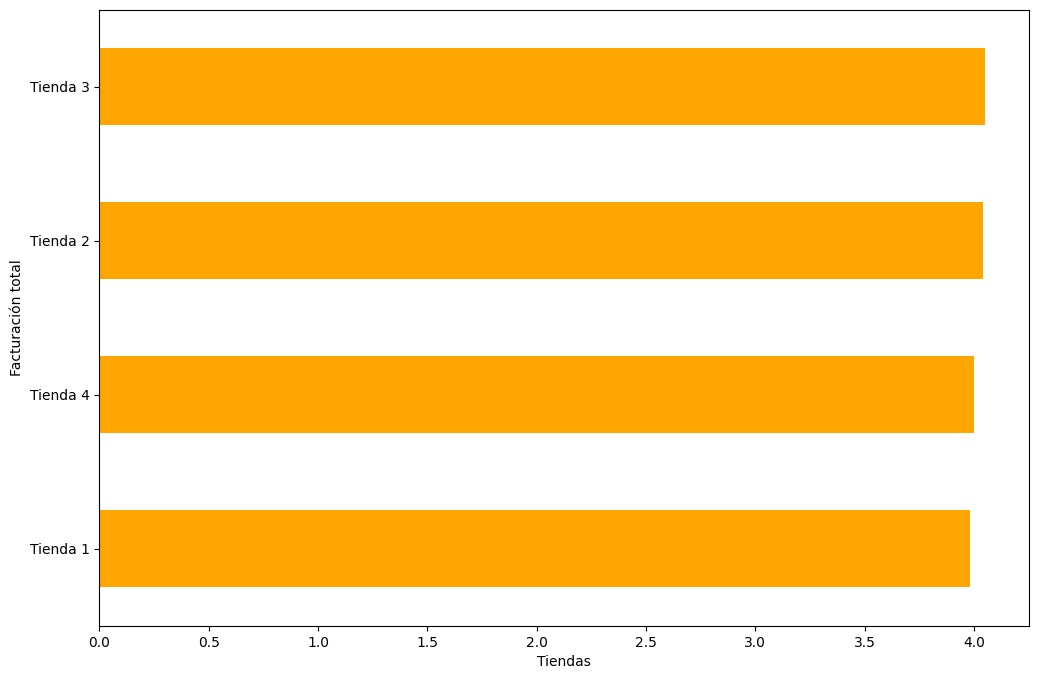

In [46]:
calificacion_por_tienda = pd.Series({
    'Tienda 1': calificacion_tienda1,
    'Tienda 2': calificacion_tienda2,
    'Tienda 3': calificacion_tienda3,
    'Tienda 4': calificacion_tienda4
})

calificacion_por_tienda = calificacion_por_tienda.sort_values(ascending=True)

calificacion_por_tienda.plot(kind='barh', figsize=(12,8), color='orange', xlabel='Tiendas', ylabel='Facturación total')

# 4. Productos más y menos vendidos

<Axes: ylabel='count'>

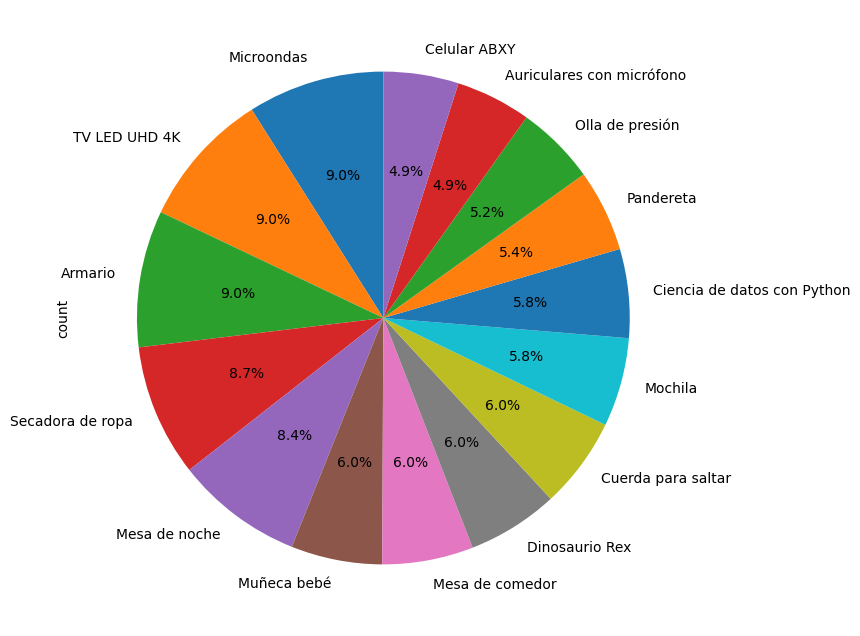

In [59]:
productos_mas_y_menos_vendidos_tienda1 = pd.concat([tienda['Producto'].value_counts().head(), tienda['Producto'].value_counts().tail(10)])
productos_mas_y_menos_vendidos_tienda1.plot(kind='pie', figsize=(12,8), autopct='%1.1f%%', startangle=90)

<Axes: ylabel='count'>

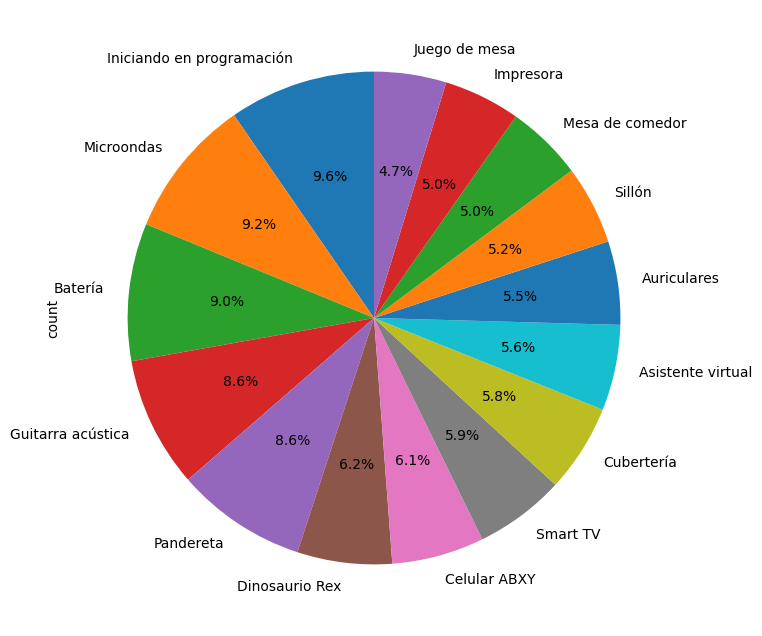

In [60]:
productos_mas_y_menos_vendidos_tienda2 = pd.concat([tienda2['Producto'].value_counts().head(), tienda2['Producto'].value_counts().tail(10)])
productos_mas_y_menos_vendidos_tienda2.plot(kind='pie', figsize=(12,8), autopct='%1.1f%%', startangle=90)

<Axes: ylabel='count'>

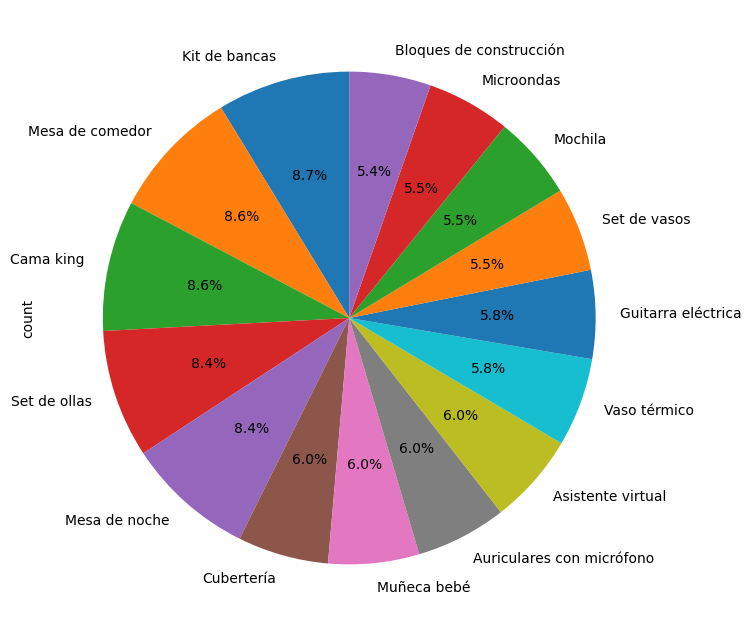

In [61]:
productos_mas_y_menos_vendidos_tienda3 = pd.concat([tienda3['Producto'].value_counts().head(), tienda3['Producto'].value_counts().tail(10)])
productos_mas_y_menos_vendidos_tienda3.plot(kind='pie', figsize=(12,8), autopct='%1.1f%%', startangle=90)

<Axes: ylabel='count'>

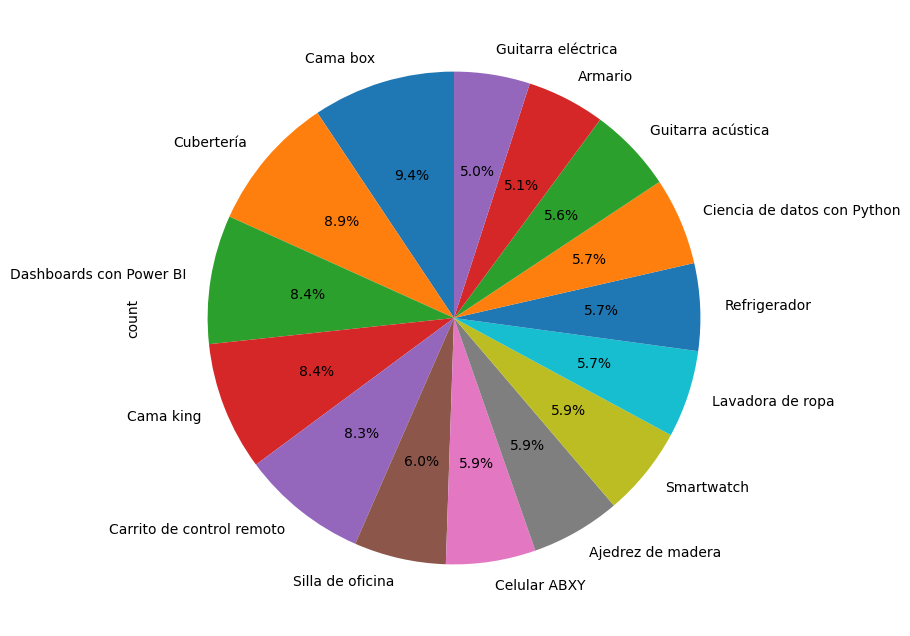

In [62]:
productos_mas_y_menos_vendidos_tienda4 = pd.concat([tienda4['Producto'].value_counts().head(), tienda4['Producto'].value_counts().tail(10)])
productos_mas_y_menos_vendidos_tienda4.plot(kind='pie', figsize=(12,8), autopct='%1.1f%%', startangle=90)

# 5. Envío promedio por tienda

In [51]:
envio_promedio_tienda1 = round(tienda['Costo de envío'].mean(),2)
envio_promedio_tienda1

np.float64(26018.61)

In [52]:
envio_promedio_tienda2 = round(tienda2['Costo de envío'].mean(),2)
envio_promedio_tienda2

np.float64(25216.24)

In [53]:
envio_promedio_tienda3 = round(tienda3['Costo de envío'].mean(),2)
envio_promedio_tienda3

np.float64(24805.68)

In [54]:
envio_promedio_tienda4 = round(tienda4['Costo de envío'].mean(),2)
envio_promedio_tienda4

np.float64(23459.46)

<Axes: xlabel='Tiendas', ylabel='Facturación total'>

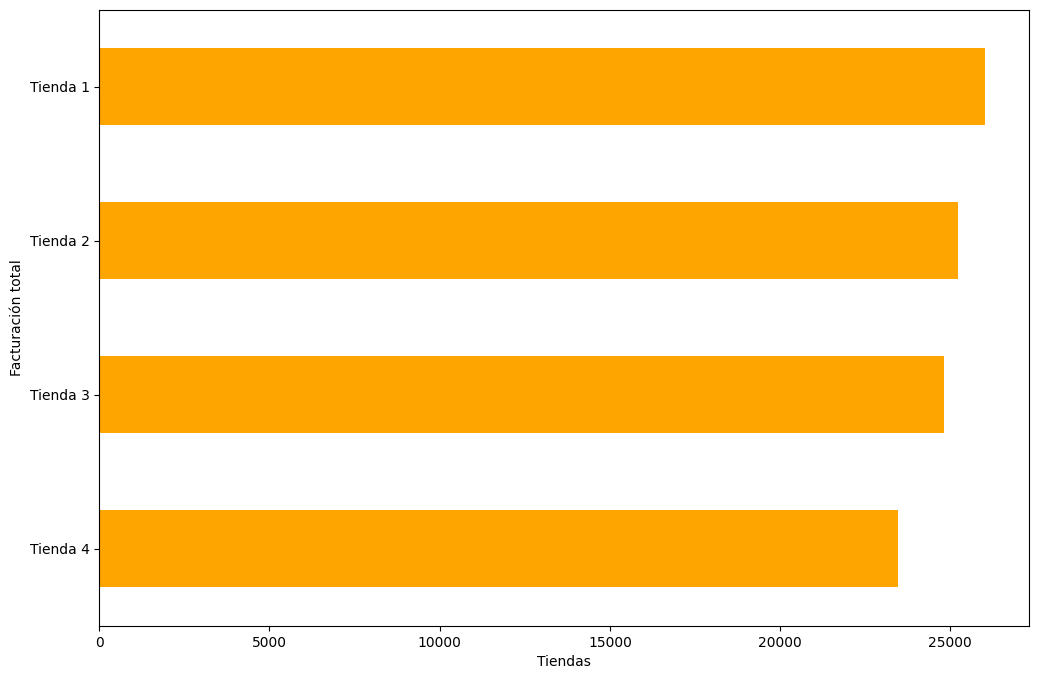

In [55]:
envio_promedio_por_tienda = pd.Series({
    'Tienda 1': envio_promedio_tienda1,
    'Tienda 2': envio_promedio_tienda2,
    'Tienda 3': envio_promedio_tienda3,
    'Tienda 4': envio_promedio_tienda4
})

envio_promedio_por_tienda = envio_promedio_por_tienda.sort_values(ascending=True)

envio_promedio_por_tienda.plot(kind='barh', figsize=(12,8), color='orange', xlabel='Tiendas', ylabel='Facturación total')

# 6. Extra: Análisis de desempeño geográfico

In [56]:
import geopandas as gpd
from shapely.geometry import Point

import folium
from folium.plugins import HeatMap

from IPython.display import display

In [57]:
tiendas_data = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre, df in tiendas_data.items():
    print(f"Generando mapa para {nombre}...")

    # Crear GeoDataFrame
    geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
    entregas_gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

    # Crear y centrar el mapa
    mapa = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=12, tiles='CartoDB Positron')

    # Agregar el HeatMap
    HeatMap(data=entregas_gdf[['lat', 'lon']].dropna().values.tolist()).add_to(mapa)

    # Añadir un marcador con el centro de la tienda
    folium.Marker(
        [df['lat'].mean(), df['lon'].mean()],
        popup=f"Centro de {nombre}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mapa)

    # Mostrar explícitamente el mapa
    display(mapa)

Generando mapa para Tienda 1...


Generando mapa para Tienda 2...


Generando mapa para Tienda 3...


Generando mapa para Tienda 4...


# 7. Gráfico de dispersión

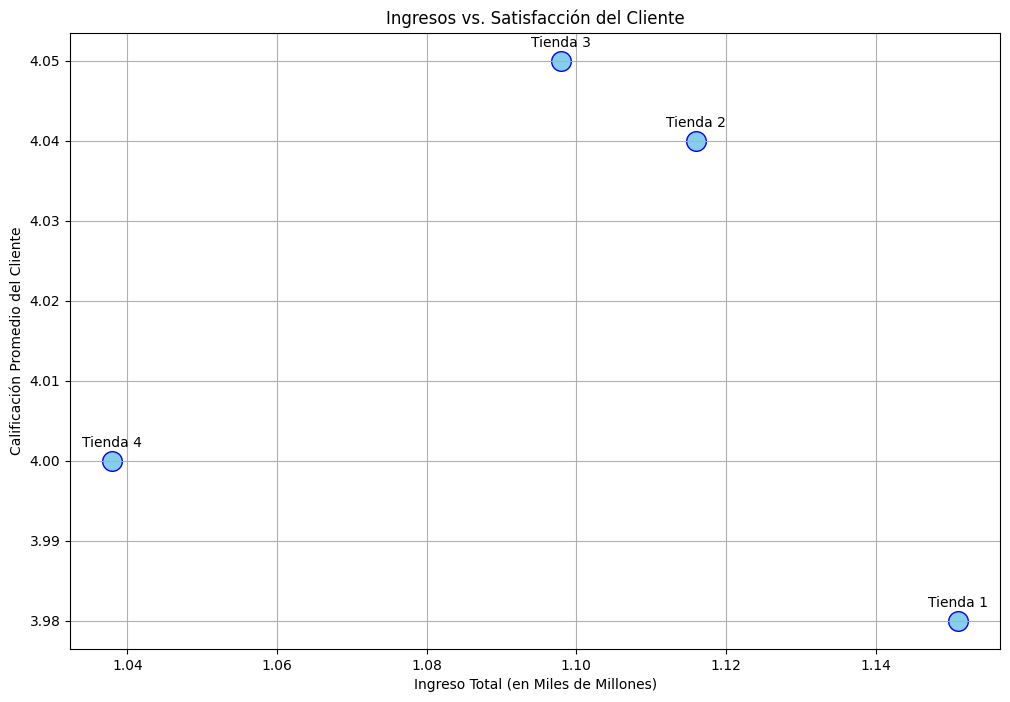

In [58]:
import matplotlib.pyplot as plt

ingresos = [1.151, 1.116, 1.098, 1.038]

calificaciones = [3.98, 4.04, 4.05, 4.00]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(12, 8))
plt.scatter(ingresos, calificaciones, s=200, color='skyblue', edgecolors='blue')

for i, txt in enumerate(tiendas):
    plt.annotate(txt, (ingresos[i], calificaciones[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Ingresos vs. Satisfacción del Cliente')
plt.xlabel('Ingreso Total (en Miles de Millones)')
plt.ylabel('Calificación Promedio del Cliente')
plt.grid(True)
plt.show()

# 8. Informe final

Estimado Sr. Juan,

El propósito de este análisis fue evaluar el rendimiento, la satisfacción del cliente y los costos operativos de las cuatro tiendas Alura Store para identificar a la **tienda menos eficiente** y recomendar su venta.

A menudo, la tienda menos eficiente no es simplemente la que menos dinero genera, sino la que presenta el **mayor costo y riesgo para crecer o sostenerse a largo plazo**. He utilizado los datos de Ingresos, Calificaciones de Clientes y Costos Logísticos para llegar a una recomendación que busca la máxima rentabilidad para su nuevo emprendimiento.

---

## **Análisis preliminar**

He analizado las tiendas comparando sus fortalezas y debilidades. La clave de la eficiencia reside en el equilibrio entre lo que se gana ($Ingresos$) y la calidad con la que se hace ($Calificación$ y $Costo$).

### A. La Gran Paradoja: Ingresos y Satisfacción

| Tienda | Ingreso Total (Aprox. Billones) | Calificación Promedio | Costo Promedio de Envío |
| :--- | :--- | :--- | :--- |
| **Tienda 1** | $1.151$ (**Máx**) | $3.98$ (**Mín**) | $26,018.61$ (**Máx**) |
| **Tienda 4** | $1.038$ (**Mín**) | $4.00$ | $23,459.46$ (**Mín**) |

El **Gráfico de Dispersión**  es la prueba visual de que la **Tienda 1** está generando su alto ingreso a costa de una mala experiencia, mientras que la **Tienda 4** es pequeña, pero ordenada.

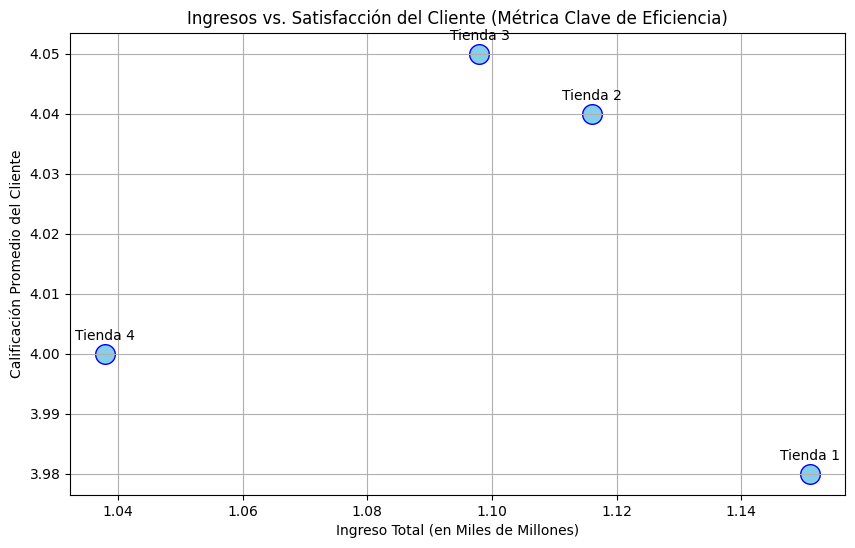

* **Tienda 1 (El Gigante con Pies de Barro):** Lidera en ingresos, pero es la de **peor calificación** y el **mayor costo de envío**. Esto indica que está sacrificando la calidad y el margen por el volumen. Es un problema **operacional** de postventa y logística, pero que genera un alto riesgo de reputación si no se corrige.
* **Tienda 4 (El Caracol Lento):** Genera el menor ingreso, pero su calificación ($4.00$) y su logística son decentes (el costo de envío más bajo). Su problema es de **escala**, no de mala gestión de calidad.

### B. Análisis del Perfil de Ventas

Al examinar los productos y categorías (incluyendo el Gráfico de Categorías de la Tienda 4), encontré una diferencia fundamental:

* **Tienda 1:** El mercado ha **validado su propuesta** (vende mucho, el $mix$ de productos funciona) y solo necesita optimizar la entrega del valor. Sus productos más vendidos (`Microondas`, `Armario`) son de alto valor, lo que soporta el alto ingreso.
* **Tienda 4:** El **Gráfico Circular**  muestra una distribución de ventas dispersa (`Muebles`, `Electrónicos`, `Juguetes`) sin un claro diferenciador de mercado que impulse la facturación. Sus ingresos son bajos porque **el mercado no ha validado fuertemente su propuesta generalista**. Sus ventas son bajas en el `Cubo de Rubik` y el `Helado de Vainilla`, metafóricamente hablando.

| Tienda | Característica | Implicación para el Sr. Juan |
| :--- | :--- | :--- |
| **Tienda 1** | Alto Ingreso, Baja Calificación | Problema **Operativo**. Fácil y barato de corregir (negociar envío, mejorar servicio). |
| **Tienda 4** | Bajo Ingreso, Sin Liderazgo Claro | Problema **Estructural**. Caro, lento y riesgoso de corregir (requiere redefinición de estrategia, $mix$ de productos, y marketing). |

---

## **Conclusión y Recomendación Final**

Sr. Juan, la **tienda menos eficiente en términos de potencial de crecimiento y esfuerzo de inversión es la Tienda 4**.

Mi recomendación es que:

1.  **Venda la Tienda 4:** Deshágase del activo con el techo de crecimiento más bajo y el problema **estructural** más difícil de revertir. Es la opción más prudente para liberar capital.
2.  **Invierta en la Tienda 1:** El capital de la venta debe inyectarse en la **Tienda 1**. Sus problemas (logística y servicio al cliente) son **operacionales y corregibles**. Al corregir la mala calificación de $3.98$ y el alto costo de envío, usted no solo asegura la tienda que más ingresos genera, sino que la convierte en una máquina de ganancias eficiente y sostenible.

En esencia, es más rentable arreglar las "ruedas pinchadas" del Ferrari (Tienda 1) que intentar hacer correr un coche que no tiene motor (Tienda 4).